In [1]:
!pip install openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jazidesigns/online-retail-uk")

print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jazidesigns/online-retail-uk/versions/1


In [4]:
!unzip online+retail.zip

unzip:  cannot find or open online+retail.zip, online+retail.zip.zip or online+retail.zip.ZIP.


In [5]:
file_path = "/root/.cache/kagglehub/datasets/jazidesigns/online-retail-uk/versions/1/Online Retail.xlsx"
data = pd.read_excel(file_path)
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.dtypes

In [9]:
data = data.astype({
    'InvoiceNo': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Country': 'string'
})


In [10]:
data.dtypes

,0
InvoiceNo,string[python]
StockCode,string[python]
Description,string[python]
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,string[python]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [12]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [13]:
data[data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
data[data['StockCode']== '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [15]:
data.StockCode.agg(count='count', unique='nunique')

,StockCode
count,541909
unique,4070


In [16]:
data[data['StockCode'] == '22139']['Description'].mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [17]:
most_freq = data[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [18]:
most_freq[most_freq['StockCode'] == '22139']

,StockCode,Description,count
37,22139,RETROSPOT TEA SET CERAMIC 11 PC,988
4781,22139,amazon,1


In [19]:
most_freq.columns = ['StockCode','Freq_Description','Count']
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Freq_Description,Count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [20]:
df1 = pd.merge(data, most_freq, on='StockCode', how='left')
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Freq_Description,112
Count,112


In [21]:
df1[df1['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [22]:
df1['Description'] = df1['Description'].mask(df1['Description'].isnull(), df1['Freq_Description'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [23]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Freq_Description,112
Count,112


In [24]:
df1.drop(['Freq_Description','Count'], axis=1, inplace=True)

In [25]:
df1.dropna(subset = ['Description'], inplace=True)
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [26]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [27]:
df1[df1['Quantity']<=0].shape[0]

10527

In [28]:
df1[df1['UnitPrice']<=0].shape[0]

2405

In [29]:
df2 = df1[(df1['Quantity']>0) & (df1['UnitPrice']>0)]
df2.shape

(530104, 8)

In [30]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [31]:
df2['Quantity'].quantile([0.75,0.9,0.95,0.9999])

,Quantity
0.7500,10.0000
0.9000,24.0000
0.9500,30.0000
0.9999,1439.8764


In [32]:
df2['UnitPrice'].quantile([0.75,0.9,0.95,0.9999])

,UnitPrice
0.7500,4.130000
0.9000,7.950000
0.9500,9.950000
0.9999,1008.744112


In [33]:
df3 = df2.copy()
df3['TotalRevenue'] = df3['Quantity'] * df3['UnitPrice']
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
df3['Year'] = df3['InvoiceDate'].dt.year
df3['Month'] = df3['InvoiceDate'].dt.month

In [35]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [36]:
df3['Year'].unique()

array([2010, 2011], dtype=int32)

In [37]:
df3.groupby('Year')['TotalRevenue'].sum()

,TotalRevenue
Year,
2010,823746.140
2011,9842938.404


In [38]:
df3[df3['Year'] == 2010]['Month'].unique()

array([12], dtype=int32)

In [39]:
#Monthly Sales for 2011
sales_2011 = df3[df3['Year'] == 2011].groupby('Month')['TotalRevenue'].sum()

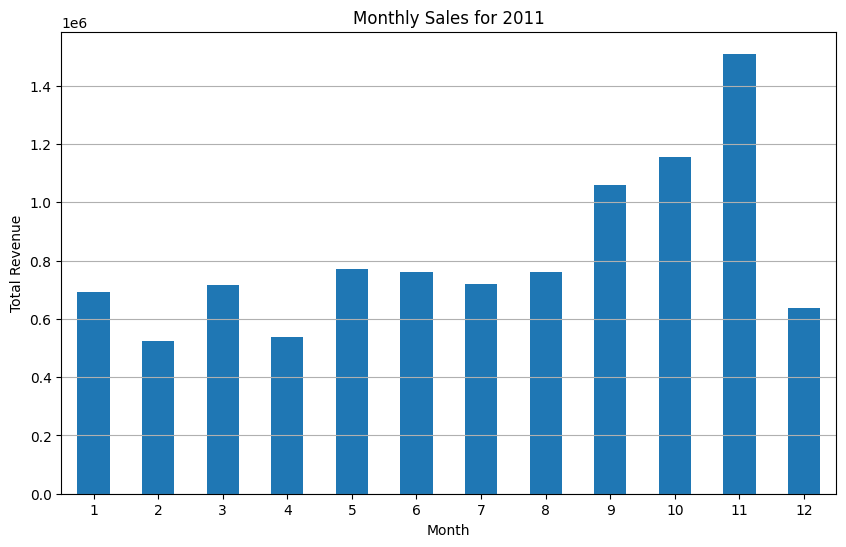

In [40]:
sales_2011.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Sales for 2011')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [41]:
country_wise_sales = df3.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()

In [42]:
sales_above_100000 = country_wise_sales[country_wise_sales['TotalRevenue'] > 100000].sort_values(by='TotalRevenue', ascending=False)

In [43]:
sales_above_100000

,Country,TotalRevenue
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310


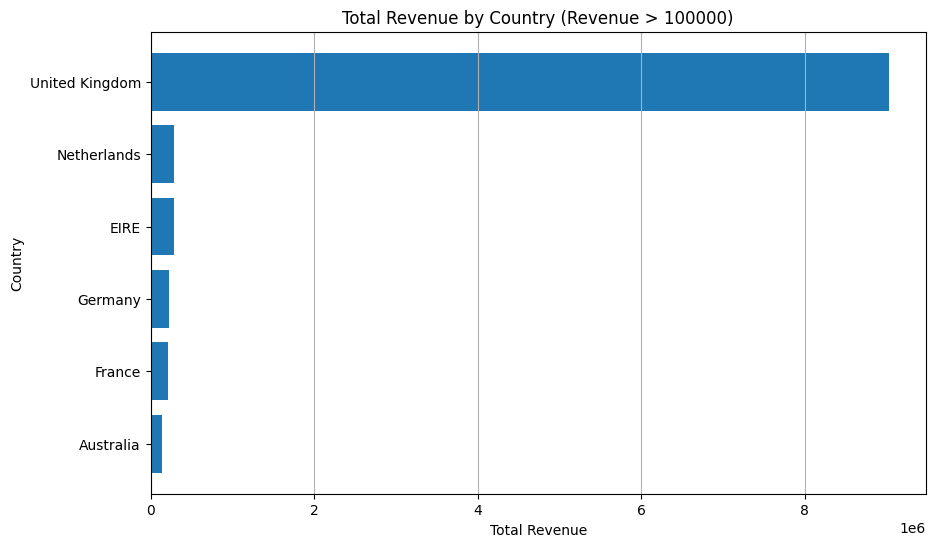

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(sales_above_100000['Country'], sales_above_100000['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Total Revenue by Country (Revenue > 100000)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.grid(axis='x')
plt.show()

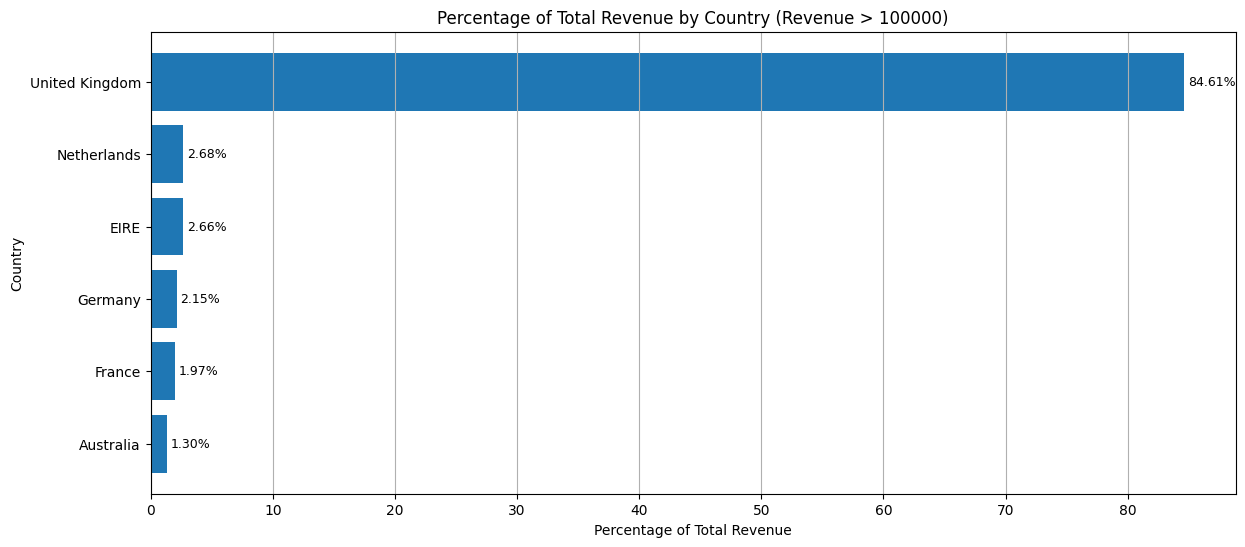

In [45]:
total_sales = country_wise_sales['TotalRevenue'].sum()

percentage_sales = (sales_above_100000['TotalRevenue'] / total_sales) * 100

plt.figure(figsize=(14, 6))
plt.barh(sales_above_100000['Country'], percentage_sales)
plt.xlabel('Percentage of Total Revenue')
plt.ylabel('Country')
plt.title('Percentage of Total Revenue by Country (Revenue > 100000)')

#show label of percentage
for i, v in enumerate(percentage_sales):
    plt.text(v+0.3, i, f'{v:.2f}%', color='black', va='center',fontsize = 9)

plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.grid(axis='x')
plt.show()

In [46]:
product_wise_sales = df3.groupby('StockCode')['TotalRevenue'].sum().sort_values(ascending=False).reset_index()

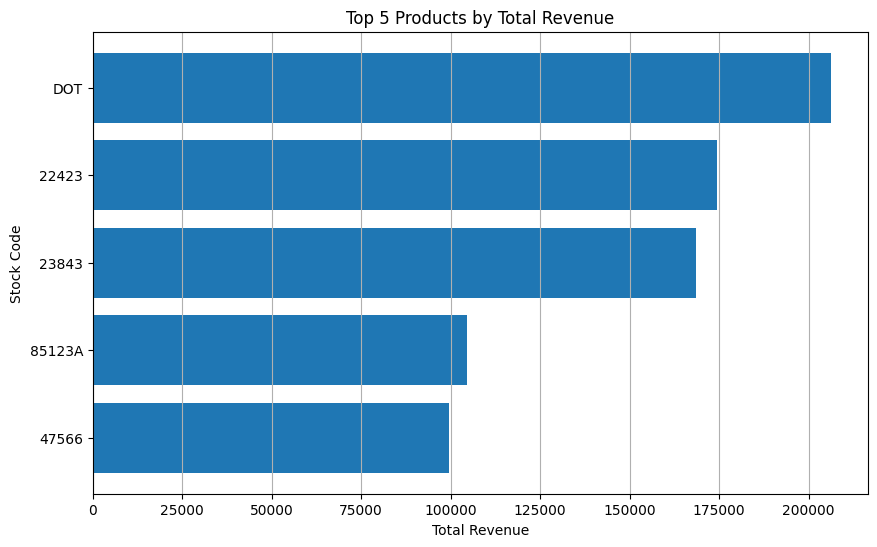

In [47]:
top_5_product = product_wise_sales.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_product['StockCode'], top_5_product['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()
plt.title('Top 5 Products by Total Revenue')
plt.grid(axis='x')
plt.show()

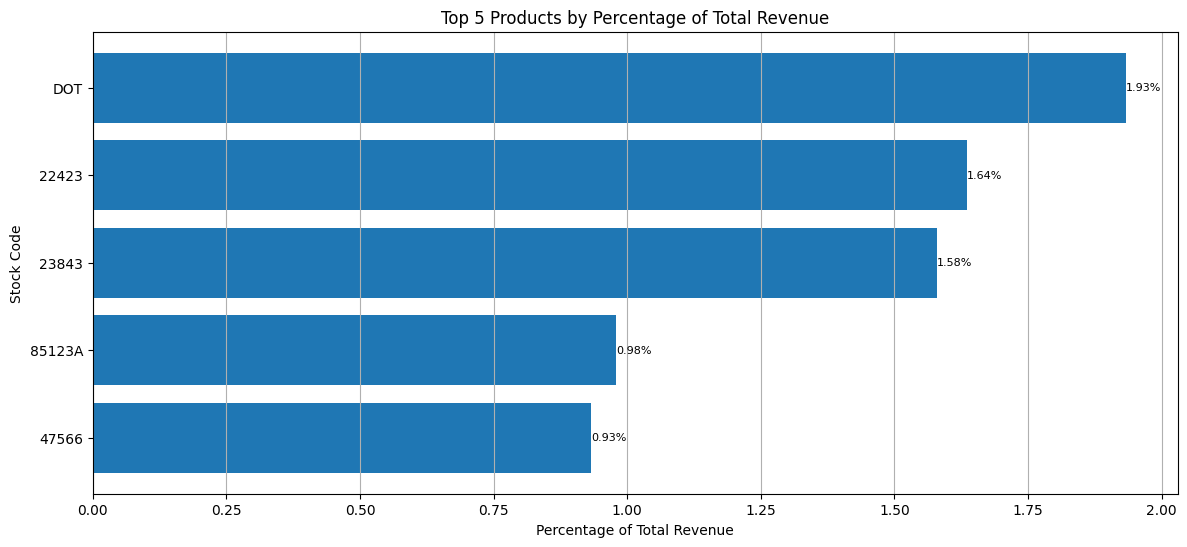

In [48]:
total_product_sales = product_wise_sales['TotalRevenue'].sum()
percentage_product_sales = (top_5_product['TotalRevenue'] / total_product_sales) * 100

plt.figure(figsize=(14, 6))
plt.barh(top_5_product['StockCode'], percentage_product_sales)
plt.xlabel('Percentage of Total Revenue')
plt.ylabel('Stock Code')
plt.gca().invert_yaxis()
plt.title('Top 5 Products by Percentage of Total Revenue')

for i, v in enumerate(percentage_product_sales):
    plt.text(v, i, f'{v:.2f}%', color='black', va='center',fontsize = 8)

plt.grid(axis='x')
plt.show()

# RFM Analysis